In [45]:
import numpy as np
import matplotlib
from scipy.linalg import eig

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(46)


def generate_data(sample_size=100, pattern='two_cluster'):
    if pattern not in ['two_cluster', 'three_cluster']:
        raise ValueError('Dataset pattern must be one of '
                         '[two_cluster, three_cluster].')
    x = np.random.normal(size=(sample_size, 2))
    if pattern == 'two_cluster':
        x[:sample_size // 2, 0] -= 4
        x[sample_size // 2:, 0] += 4
    else:
        x[:sample_size // 4, 0] -= 4
        x[sample_size // 4:sample_size // 2, 0] += 4
    y = np.ones(sample_size, dtype=np.int64)
    y[sample_size // 2:] = 2
    return x, y


def fda(x, y):
    """Fisher Discriminant Analysis.
    Implement this function

    Returns
    -------
    T : (1, 2) ndarray
        The embedding matrix.
    """
    Sb = np.zeros((2, 2))
    Sb += sample_size//2*np.mean(x[:sample_size//2, :], axis=0).reshape(2, 1)@np.mean(x[:sample_size//2, :], axis=0).reshape(2, 1).T
    Sb += sample_size//2*np.mean(x[sample_size//2:, :], axis=0).reshape(2, 1)@np.mean(x[sample_size//2:, :], axis=0).reshape(2, 1).T

    Sw = np.zeros((2, 2))
    for i in range(0, sample_size//2):
        Sw += (x[i,:] - np.mean(x[:sample_size//2, :], axis=0)).reshape(2, 1)@(x[i,:] - np.mean(x[:sample_size//2, :], axis=0)).reshape(2, 1).T
    for i in range(sample_size//2, sample_size):
        Sw += (x[i,:] - np.mean(x[sample_size//2:, :], axis=0)).reshape(2, 1)@(x[i,:] - np.mean(x[sample_size//2:, :], axis=0)).reshape(2, 1).T
    eigval, eigvec = eig(Sb, Sw)
    if eigval[0] > eigval[1]:
        return eigvec[:, 0].reshape(1, 2)
    else:
        return eigvec[:, 1].reshape(1, 2)

def visualize(x, y, T):
    plt.figure(1, (6, 6))
    plt.clf()
    plt.xlim(-7., 7.)
    plt.ylim(-7., 7.)
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'bo', label='class-1')
    plt.plot(x[y == 2, 0], x[y == 2, 1], 'rx', label='class-2')
    plt.plot(np.array([-T[:, 0], T[:, 0]]) * 9, np.array([-T[:, 1], T[:, 1]]) * 9, 'k-')
    plt.legend()
    plt.savefig('lecture11-h1.png')


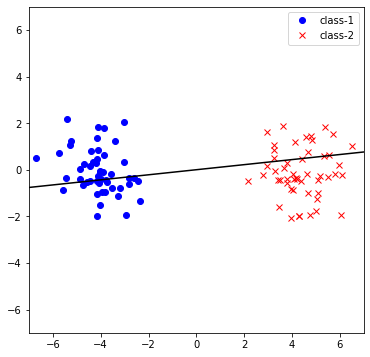

In [46]:
sample_size = 100
x, y = generate_data(sample_size=sample_size, pattern='two_cluster')
#x, y = generate_data(sample_size=sample_size, pattern='three_cluster')
T = fda(x, y)
visualize(x, y, T)

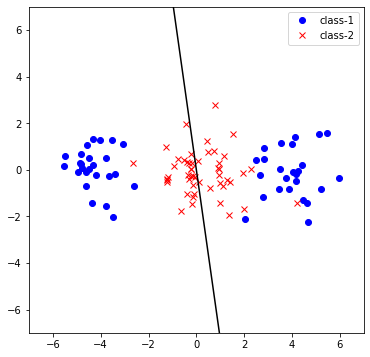

In [47]:
sample_size = 100
#x, y = generate_data(sample_size=sample_size, pattern='two_cluster')
x, y = generate_data(sample_size=sample_size, pattern='three_cluster')
T = fda(x, y)
visualize(x, y, T)